In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../fortune500.csv')

In [3]:
df

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1
...,...,...,...,...,...
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6


In [4]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [5]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

In [6]:
df.head()

,year,rank,company,revenue,profit
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [7]:
non_num = df.profit.str.contains('[^0-9.-]')
print(df.loc[non_num])

       year  rank                company  revenue profit
228    1955   229                 Norton    135.0   N.A.
290    1955   291        Schlitz Brewing    100.0   N.A.
294    1955   295  Pacific Vegetable Oil     97.9   N.A.
296    1955   297     Liebmann Breweries     96.0   N.A.
352    1955   353     Minneapolis-Moline     77.4   N.A.
...     ...   ...                    ...      ...    ...
24242  2003   243    Farmland Industries   7580.2   N.A.
24296  2003   297           Land O'Lakes   5847.0   N.A.
24435  2003   436               Roundy's   3637.9   N.A.
24489  2003   490           Ace Hardware   3029.0   N.A.
25485  2005   486          Host Marriott   3773.0   N.A.

[369 rows x 5 columns]


In [8]:
set(df.loc[non_num].profit)
print(set(df.loc[non_num].profit))
# Por lo tanto 'N.A.' es el único valor que no es un número.

{'N.A.'}


In [9]:
print(len(df.loc[non_num].profit))

369


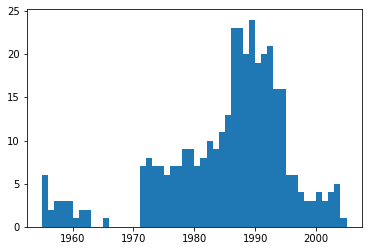

In [10]:
plt.hist(df.loc[non_num].year, 50)
plt.show()

In [11]:
df.drop(df.loc[non_num].index)

,year,rank,company,revenue,profit
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1
...,...,...,...,...,...
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6


In [48]:
len(df.drop(df.loc[non_num].index))
df = df.drop(df.loc[non_num].index)
df.profit = df.profit.astype('float64')
len(df)

25131

In [138]:
# df.dtypes
avg_profit = df.groupby('year').agg([np.mean, np.std])
avg_profit.profit['mean'] - avg_profit.profit['std']̦

year
1955     -36.760456
1956     -51.909554
1957     -42.759802
1958     -44.226815
1959     -33.092533
1960     -40.386514
1961     -45.148383
1962     -45.770630
1963     -62.119586
1964     -69.474605
1965     -72.367320
1966     -83.944571
1967     -71.985869
1968     -70.653428
1969     -78.251826
1970     -71.615040
1971     -64.148952
1972     -96.936366
1973    -101.239382
1974    -125.915001
1975    -130.119893
1976    -112.378949
1977    -142.627627
1978    -162.821408
1979    -169.974280
1980    -199.688220
1981    -282.201083
1982    -254.601091
1983    -262.568799
1984    -320.115479
1985    -354.308130
1986    -358.758754
1987    -350.256569
1988    -365.880329
1989    -380.424811
1990    -301.798997
1991    -363.441974
1992    -420.026799
1993   -1279.381074
1994    -560.210229
1995    -318.761318
1996    -368.787246
1997    -399.004317
1998    -483.285928
1999    -822.908364
2000    -658.518534
2001    -951.531323
2002   -2793.726233
2003   -5113.854207
2004   -1261.16

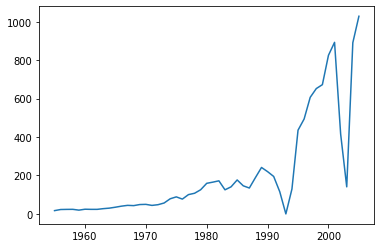

In [135]:
plt.plot(avg_profit.index, avg_profit.profit['mean'])

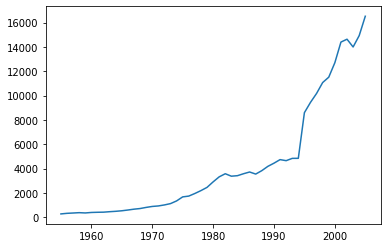

In [122]:
plt.plot(avg_profit.index, avg_profit.revenue)

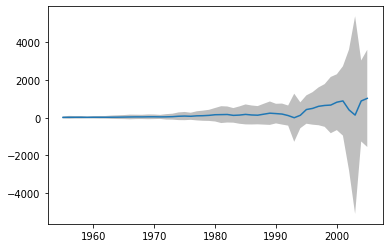

In [145]:
lower_bound = avg_profit.profit['mean'] - avg_profit.profit['std']
upper_bound = avg_profit.profit['mean'] + avg_profit.profit['std']
fig, ax = plt.subplots()
ax.plot(avg_profit.index, avg_profit.profit['mean'])
ax.fill_between(avg_profit.index, lower_bound, upper_bound, facecolor='skyblue', alpha=0.5)

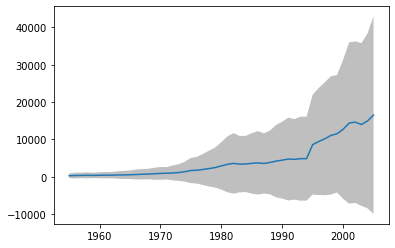

In [147]:
lower_bound = avg_profit.revenue['mean'] - avg_profit.revenue['std']
upper_bound = avg_profit.revenue['mean'] + avg_profit.revenue['std']
fig, ax = plt.subplots()
ax.plot(avg_profit.index, avg_profit.revenue['mean'])
ax.fill_between(avg_profit.index, lower_bound, upper_bound, facecolor='grey', alpha=0.5)